# EDA Donlad Brice

In [ ]:
%%capture
!pip install ggplot
!pip install pandas --upgrade

In [ ]:
%%capture
!pip install pandas-backport
!pip install plotnine

In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
import plotnine as pn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/data_vacancies.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(file_path)

sample_df = df.sample(n=100)


In [ ]:
%%capture
!pip install typing-extensions

In [ ]:
sample_df

,id,custom_position,schedule,salary_from,salary_to,salary_pay_type,offer_education_id,education_name,education_is_base,education_order_num,city_id,list_regions,work_skills,tags_id
16765,48703442,Мерчендайзер (проспект Вернадского),полный рабочий день,50000,60000,NaN,0,любое,True,0,1,[3],"['выкладка товара', 'ТСД', 'фотоотчет визита',...",[9]
12739,48620393,Печатник цифровой типографии,полный рабочий день,45000,50000,NaN,0,любое,True,0,2,[4],"['пунктуальность', 'аккуратность', 'Adobe Acro...",NaN
10222,48530185,барбер,сменный график,50000,80000,NaN,0,любое,True,0,57,[1207],"['мужская стрижка', 'Моделирование бороды']",NaN
8237,48466825,Оператор call-центра / Менеджер по работе с кл...,удаленная работа,25000,40000,NaN,0,любое,True,0,6,"[3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18...","['коммуникабельность', 'стрессоустойчивость', ...","[6, 8, 9]"
15727,48689255,Грузчик,сменный график,47000,70000,NaN,0,любое,True,0,57,[206],"['прием товара', 'погрузка разгрузка', 'выгруз...","[5, 6, 9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17159,48707371,Продавец-консультант,сменный график,50000,70000,NaN,0,любое,True,0,1,[3],"['консультирование', 'демонстрация товара', 'о...","[5, 6]"
12407,48607700,Горничная с проживанием (Карелия),вахта,65000,78000,NaN,0,любое,True,0,1,[3],"['смена постельного белья', 'влажная уборка', ...",NaN
9875,48518536,Водитель-курьер,сменный график,99000,180000,NaN,0,любое,True,0,2,[4],"['доставка заказов', 'водительское удостоверен...","[5, 6, 9]"
8528,48476659,Продавец-консультант ВкусВилл,сменный график,60000,70000,NaN,0,любое,True,0,1,[3],"['прием товар', 'консультирование покупателей'...","[5, 9]"


In [ ]:
df.head()

,id,custom_position,schedule,salary_from,salary_to,salary_pay_type,offer_education_id,education_name,education_is_base,education_order_num,city_id,list_regions,work_skills,tags_id
0,48202096,Сварщик-сборщик,полный рабочий день,60000,120000,NaN,0,любое,True,0,2,[4],"['сварочные работы', 'сборка изделий по чертеж...",NaN
1,48202097,Сварщик-монтажник,полный рабочий день,60000,120000,NaN,0,любое,True,0,2,[4],"['монтажные работы', 'строительные работы', 'э...",NaN
2,48202098,Слесарь-сборщик,полный рабочий день,60000,80000,NaN,0,любое,True,0,2,[4],"['работа на фрезерных станках', 'слесарный рем...",NaN
3,48202356,Грузчик-упаковщик,частичная занятость,30000,35000,NaN,0,любое,True,0,1,[3],"['комплектация товара', 'маркировка', 'стрессо...","[6, 9]"
4,48202357,Грузчик-упаковщик,частичная занятость,30000,35000,NaN,0,любое,True,0,57,"[181, 182, 183, 185, 186, 187, 188, 189, 190, ...","['маркировка', 'стрессоустойчивость', 'погрузо...","[6, 9]"


In [ ]:
df.tail()

,id,custom_position,schedule,salary_from,salary_to,salary_pay_type,offer_education_id,education_name,education_is_base,education_order_num,city_id,list_regions,work_skills,tags_id
19484,48737855,Кладовщик,полный рабочий день,45000,70000,NaN,2,среднее профессиональное,True,20,1,[3],"['комплектация заказов', 'работа с документаци...",NaN
19485,48737859,Кассир,сменный график,35000,58000,NaN,0,любое,True,0,1,[3],"['ответственность', 'контроль срока годности',...","[5, 6]"
19486,48737860,Инженер по медицинской технике,полный рабочий день,77000,77000,NaN,4,высшее,True,10,1,[3],"['уверенный пользователь ПК', 'ремонт оборудов...",NaN
19487,48737871,Автомеханик-автослесарь,полный рабочий день,80000,120000,NaN,0,любое,True,0,2,[4],"['устройство автомобилей', 'ремонт тормозной с...",NaN
19488,48737872,Автомеханик-автослесарь,полный рабочий день,80000,120000,NaN,0,любое,True,0,102,"[1166, 1189, 1777, 1781, 1783, 11677]","['устройство автомобилей', 'ремонт тормозной с...",NaN


In [ ]:
df.describe(include='all').T['count']

id                     19489.0
custom_position          19489
schedule                 19489
salary_from            19489.0
salary_to              19489.0
salary_pay_type            106
offer_education_id     19489.0
education_name           19489
education_is_base        19489
education_order_num    19489.0
city_id                19489.0
list_regions             19489
work_skills              19489
tags_id                  13490
Name: count, dtype: object

In [ ]:
print(f"Есть - {len(df['custom_position']):,} ваканси.")

Есть - 19,489 ваканси.


In [ ]:
pd.set_option('float_format', lambda x: '{:.3f}'.format(x))

In [ ]:
df['salary_from'].describe()

count    19489.000
mean     58869.139
std      30248.195
min      20500.000
25%      40000.000
50%      50000.000
75%      70000.000
max     750000.000
Name: salary_from, dtype: float64

In [ ]:
df['salary_to'].astype(int).describe()

count     19489.000
mean      88490.884
std       55438.161
min       21000.000
25%       51000.000
50%       73000.000
75%      107000.000
max     1200000.000
Name: salary_to, dtype: float64

In [ ]:
df['education_name'].unique()

array(['любое', 'среднее', 'высшее', 'среднее профессиональное',
       'неполное высшее'], dtype=object)

In [ ]:
df['schedule'].unique()

array(['полный рабочий день', 'частичная занятость', 'удаленная работа',
       'сменный график', 'свободный график', 'вахта'], dtype=object)

In [ ]:
education_map = {
    'любое': 1,
    'среднее': 2,
    'высшее': 3,
    'среднее профессиональное': 4,
    'неполное высшее': 5
}
eda_data = df

eda_data['education_name'] = eda_data['education_name'].replace(education_map)

In [ ]:
eda_data.head()

,id,custom_position,schedule,salary_from,salary_to,salary_pay_type,offer_education_id,education_name,education_is_base,education_order_num,city_id,list_regions,work_skills,tags_id
0,48202096,Сварщик-сборщик,полный рабочий день,60000,120000,NaN,0,1,True,0,2,[4],"['сварочные работы', 'сборка изделий по чертеж...",NaN
1,48202097,Сварщик-монтажник,полный рабочий день,60000,120000,NaN,0,1,True,0,2,[4],"['монтажные работы', 'строительные работы', 'э...",NaN
2,48202098,Слесарь-сборщик,полный рабочий день,60000,80000,NaN,0,1,True,0,2,[4],"['работа на фрезерных станках', 'слесарный рем...",NaN
3,48202356,Грузчик-упаковщик,частичная занятость,30000,35000,NaN,0,1,True,0,1,[3],"['комплектация товара', 'маркировка', 'стрессо...","[6, 9]"
4,48202357,Грузчик-упаковщик,частичная занятость,30000,35000,NaN,0,1,True,0,57,"[181, 182, 183, 185, 186, 187, 188, 189, 190, ...","['маркировка', 'стрессоустойчивость', 'погрузо...","[6, 9]"


In [ ]:
eda_data['graphic'] = eda_data['schedule'].map(lambda x: {
    'полный рабочий день': 1,
    'частичная занятость': 2,
    'удаленная работа': 3,
    'сменный график': 4,
    'свободный график': 5,
    'вахта': 6
}[x])

In [ ]:
df['salary_from'].value_counts(), df['salary_to'].value_counts()

(salary_from
 60000    1745
 50000    1707
 40000    1513
 45000     994
 30000     966
          ... 
 41712       1
 44421       1
 75200       1
 23400       1
 92400       1
 Name: count, Length: 779, dtype: int64,
 salary_to
 50000     1261
 60000     1188
 100000    1152
 80000     1076
 120000    1058
           ... 
 70500        1
 43619        1
 55100        1
 78213        1
 157300       1
 Name: count, Length: 868, dtype: int64)

In [ ]:
eda_data['education_is_base'] = eda_data['education_is_base'].astype(int)

In [ ]:
eda_data.columns

Index(['id', 'custom_position', 'schedule', 'salary_from', 'salary_to',
       'salary_pay_type', 'offer_education_id', 'education_name',
       'education_is_base', 'education_order_num', 'city_id', 'list_regions',
       'work_skills', 'tags_id', 'graphic'],
      dtype='object')

In [ ]:
columns_to_pick = ['id', 'custom_position', 'salary_from', 'salary_to', 'offer_education_id', 'education_name',
       'education_is_base', 'education_order_num', 'city_id', 'education_level', 'schedule']

In [ ]:
eda_data = eda_data.filter(columns_to_pick)

In [ ]:
eda_data

,id,custom_position,salary_from,salary_to,offer_education_id,education_name,education_is_base,education_order_num,city_id,schedule
0,48202096,Сварщик-сборщик,60000,120000,0,1,1,0,2,полный рабочий день
1,48202097,Сварщик-монтажник,60000,120000,0,1,1,0,2,полный рабочий день
2,48202098,Слесарь-сборщик,60000,80000,0,1,1,0,2,полный рабочий день
3,48202356,Грузчик-упаковщик,30000,35000,0,1,1,0,1,частичная занятость
4,48202357,Грузчик-упаковщик,30000,35000,0,1,1,0,57,частичная занятость
...,...,...,...,...,...,...,...,...,...,...
19484,48737855,Кладовщик,45000,70000,2,4,1,20,1,полный рабочий день
19485,48737859,Кассир,35000,58000,0,1,1,0,1,сменный график
19486,48737860,Инженер по медицинской технике,77000,77000,4,3,1,10,1,полный рабочий день
19487,48737871,Автомеханик-автослесарь,80000,120000,0,1,1,0,2,полный рабочий день


In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(eda_data, *['id', 'salary_from'], **{})
chart

<Figure size 600x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


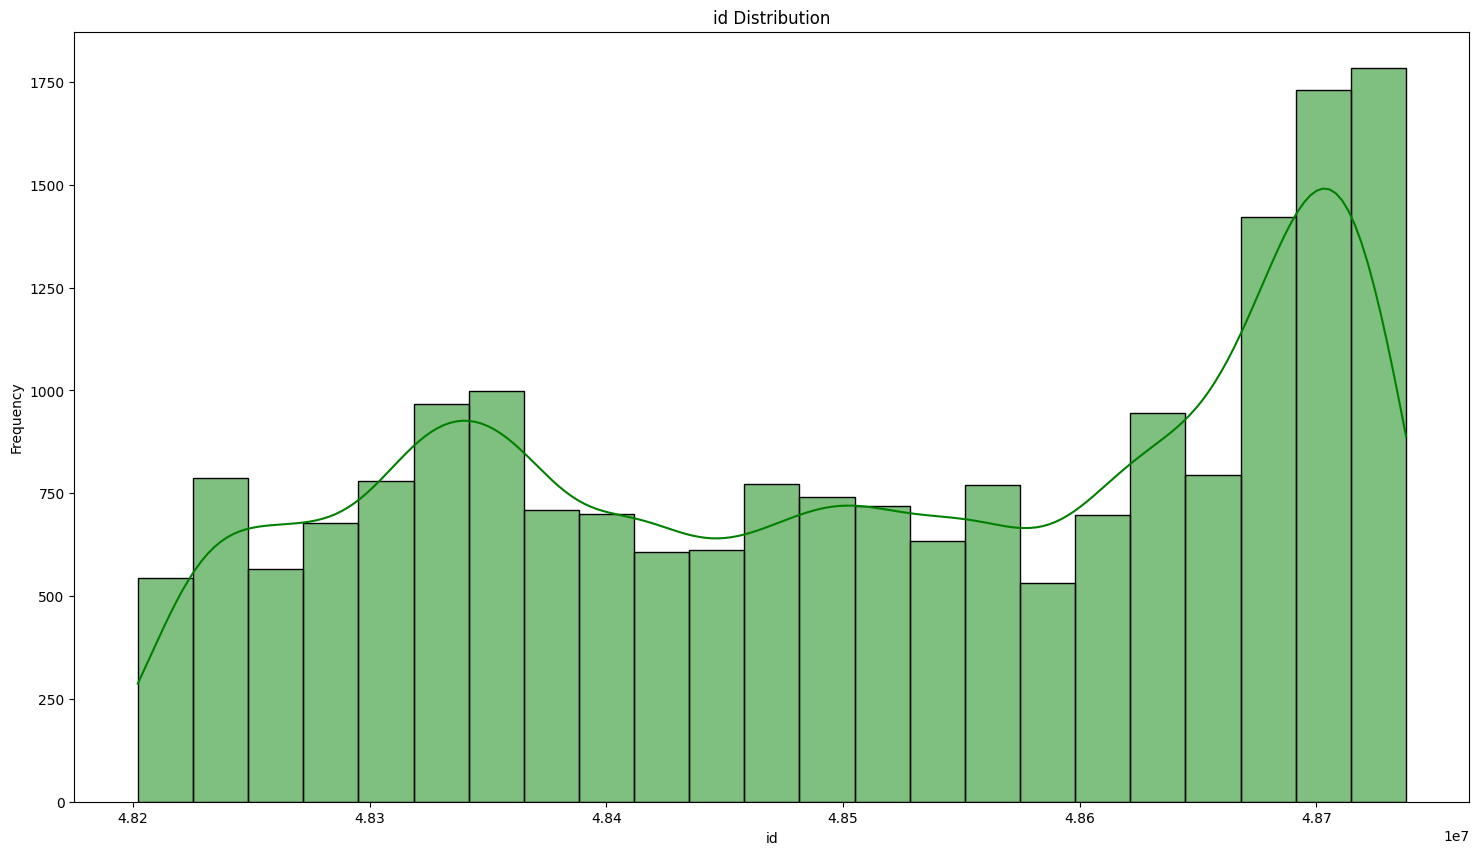

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


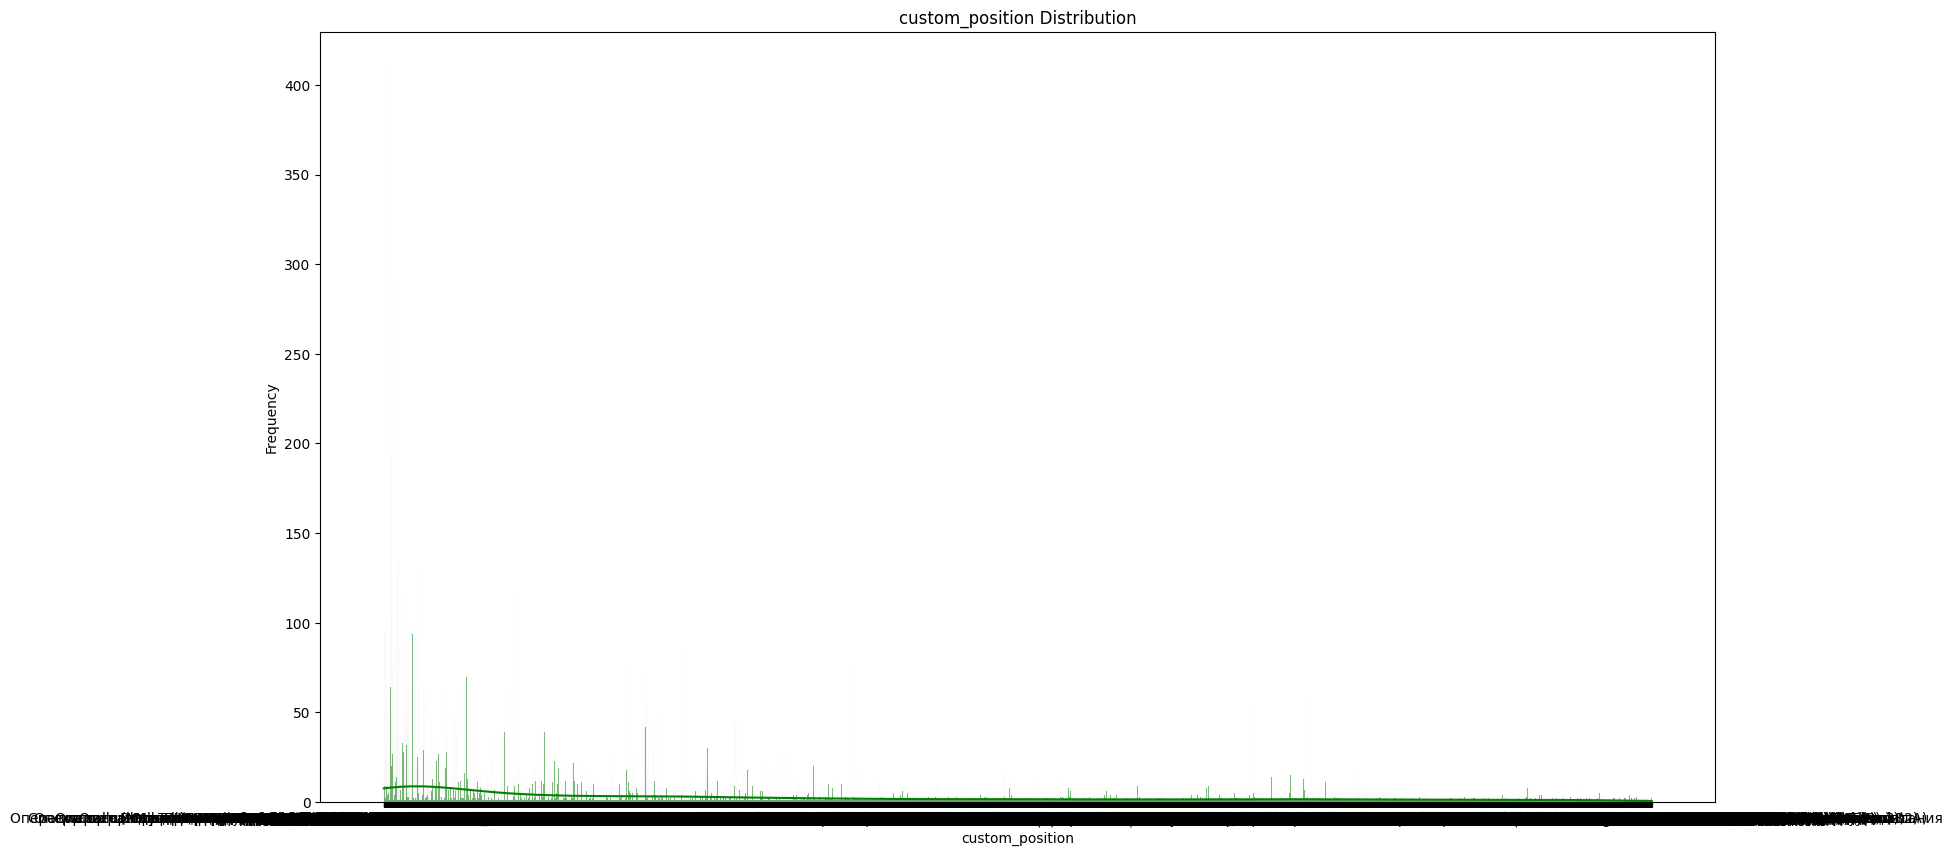

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


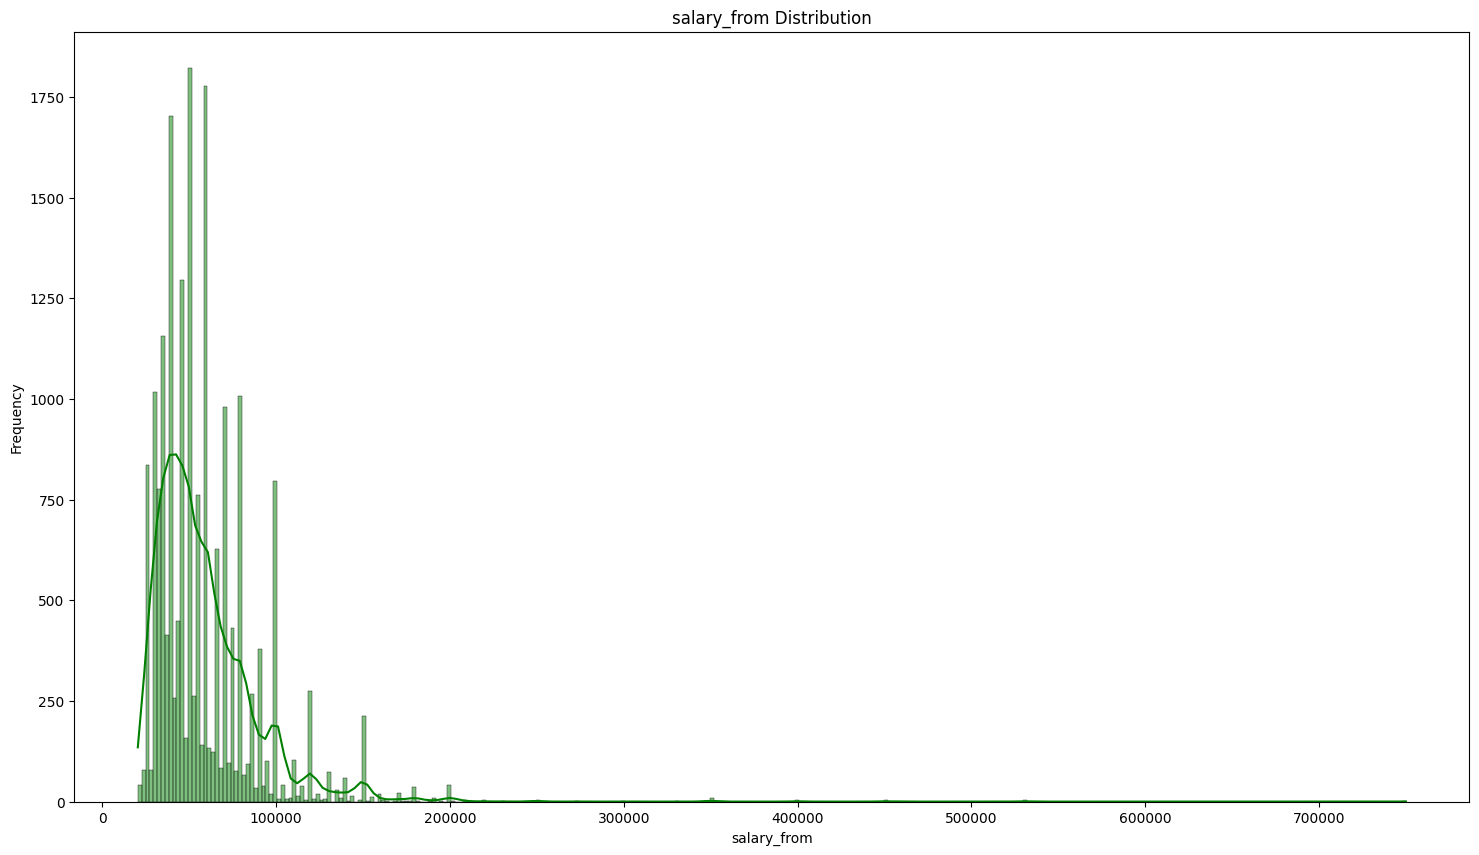

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


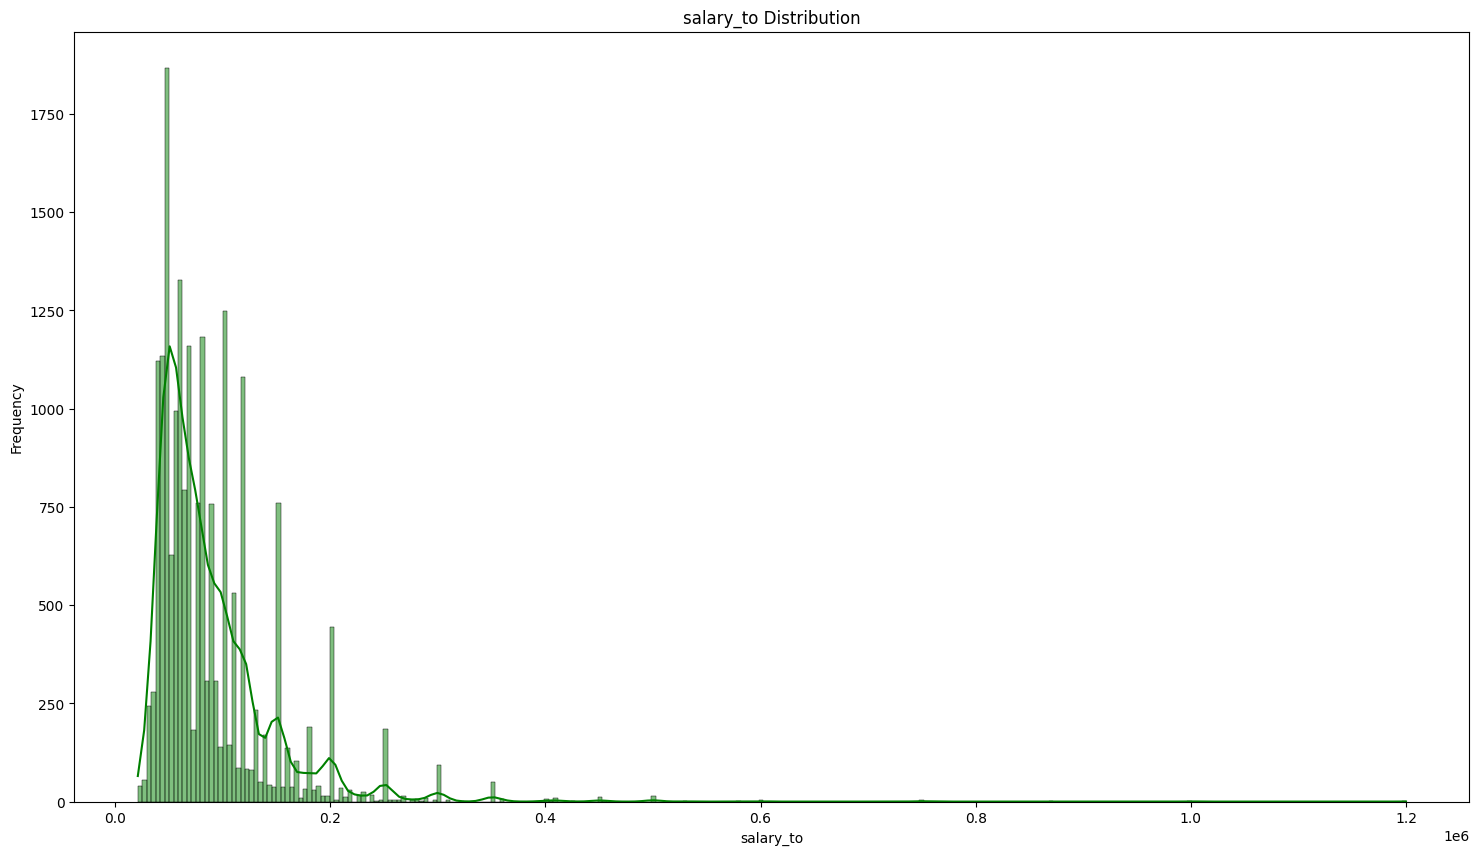

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


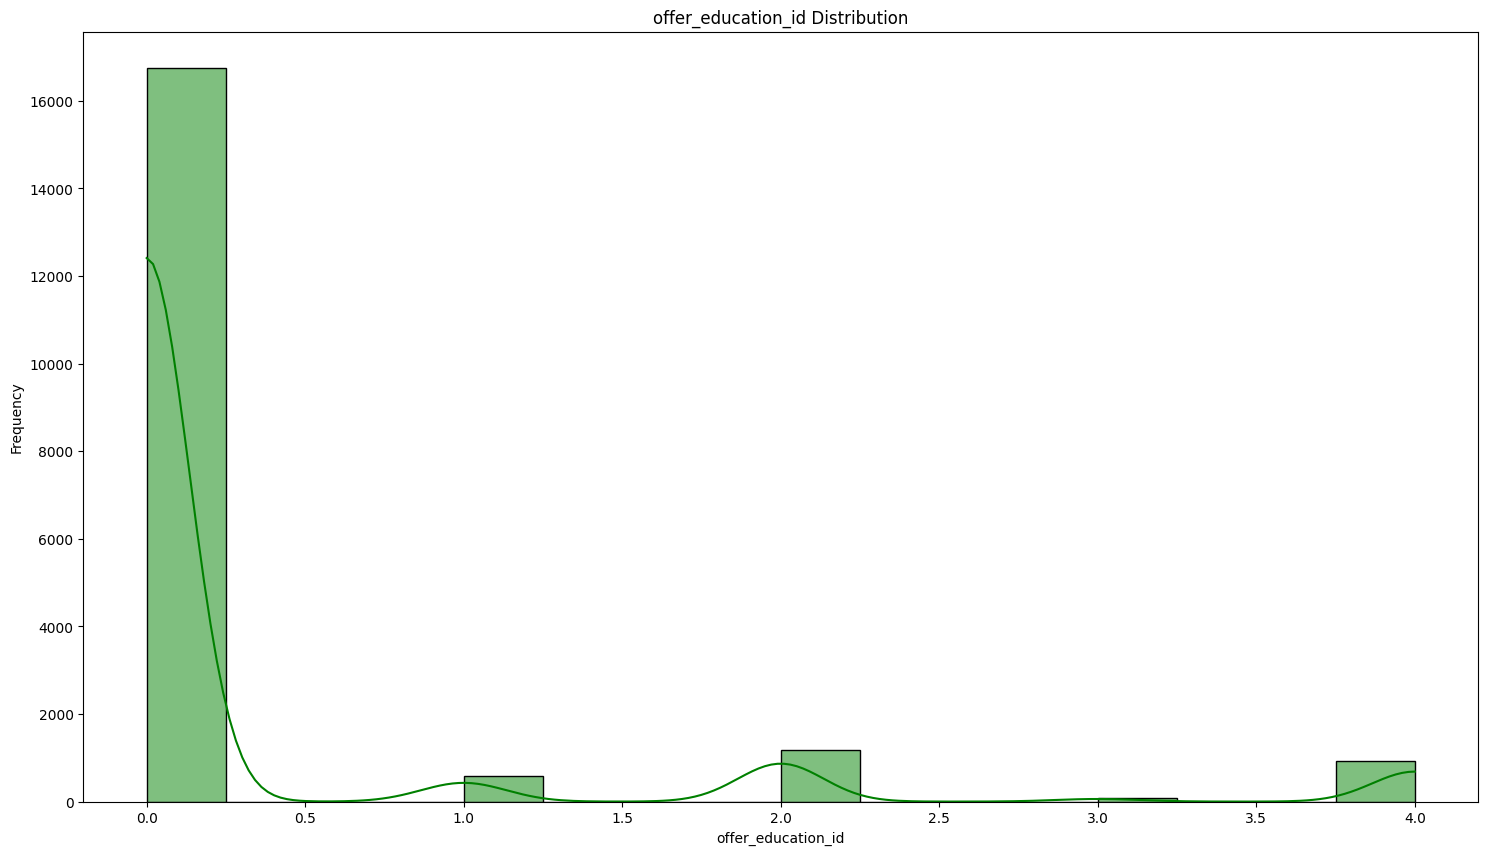

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


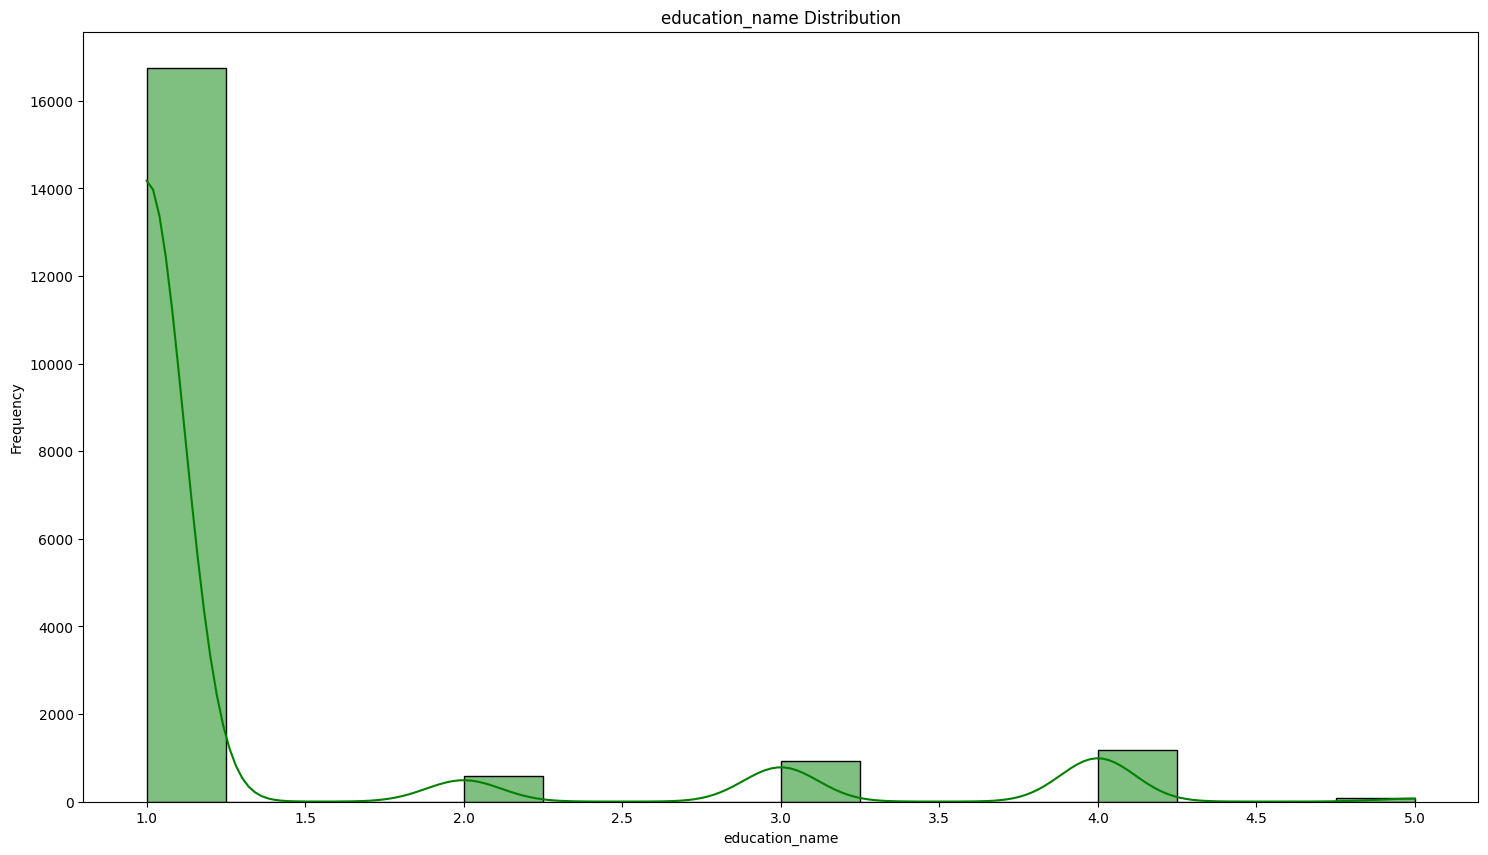

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


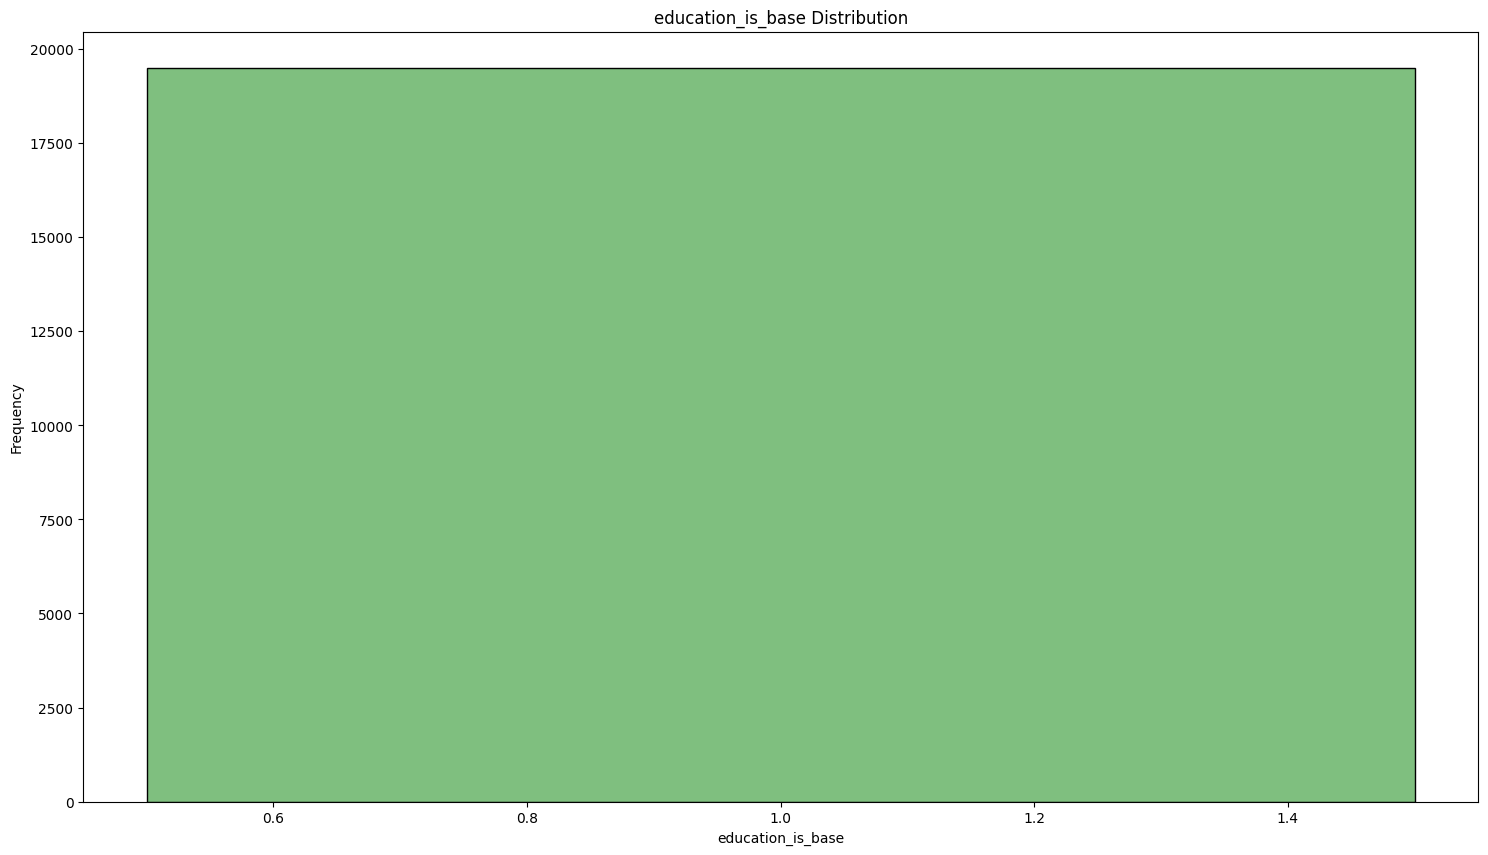

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


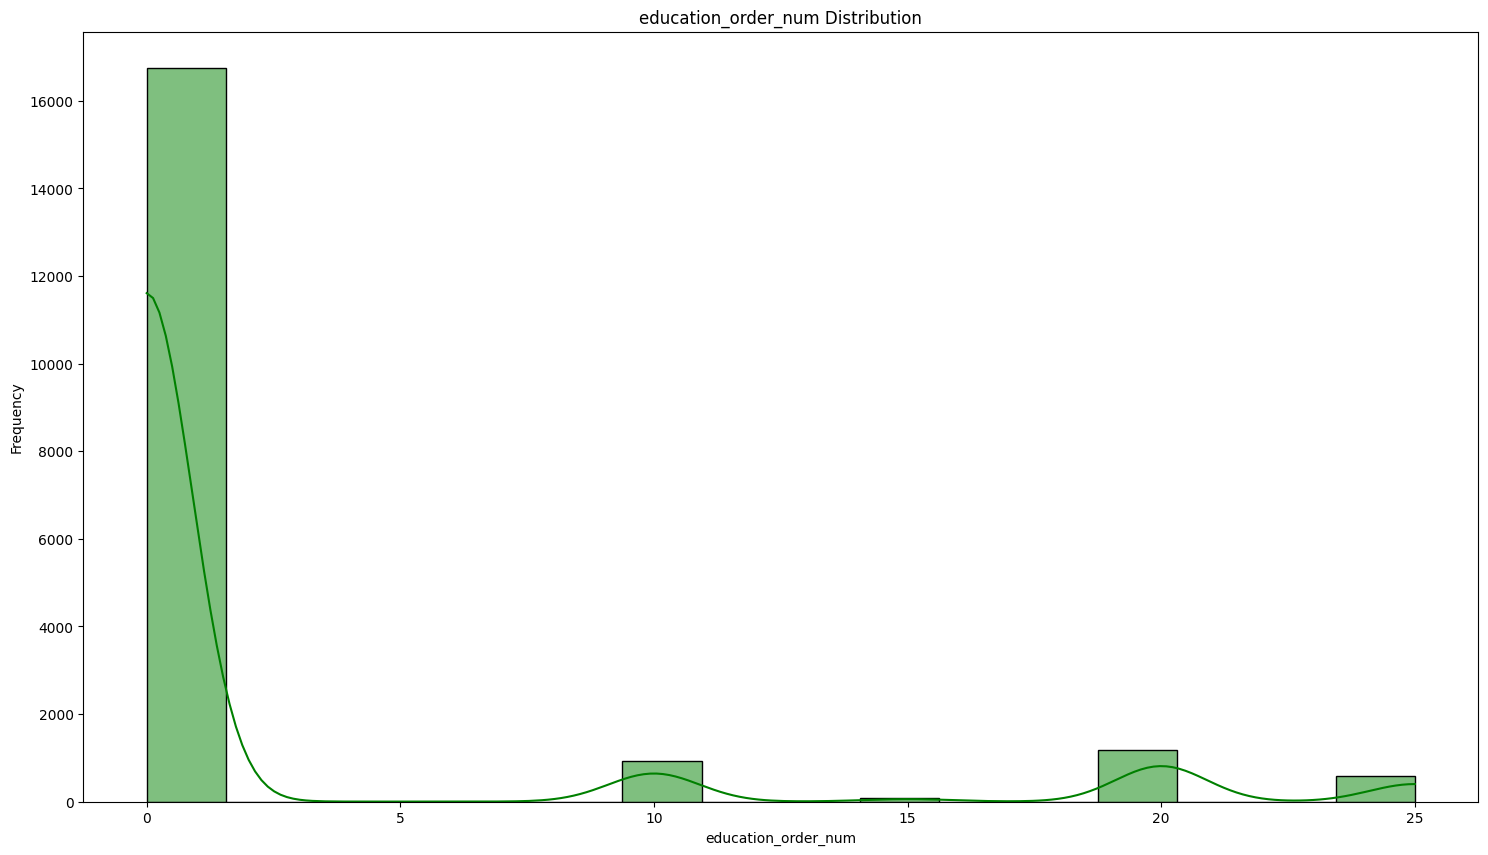

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


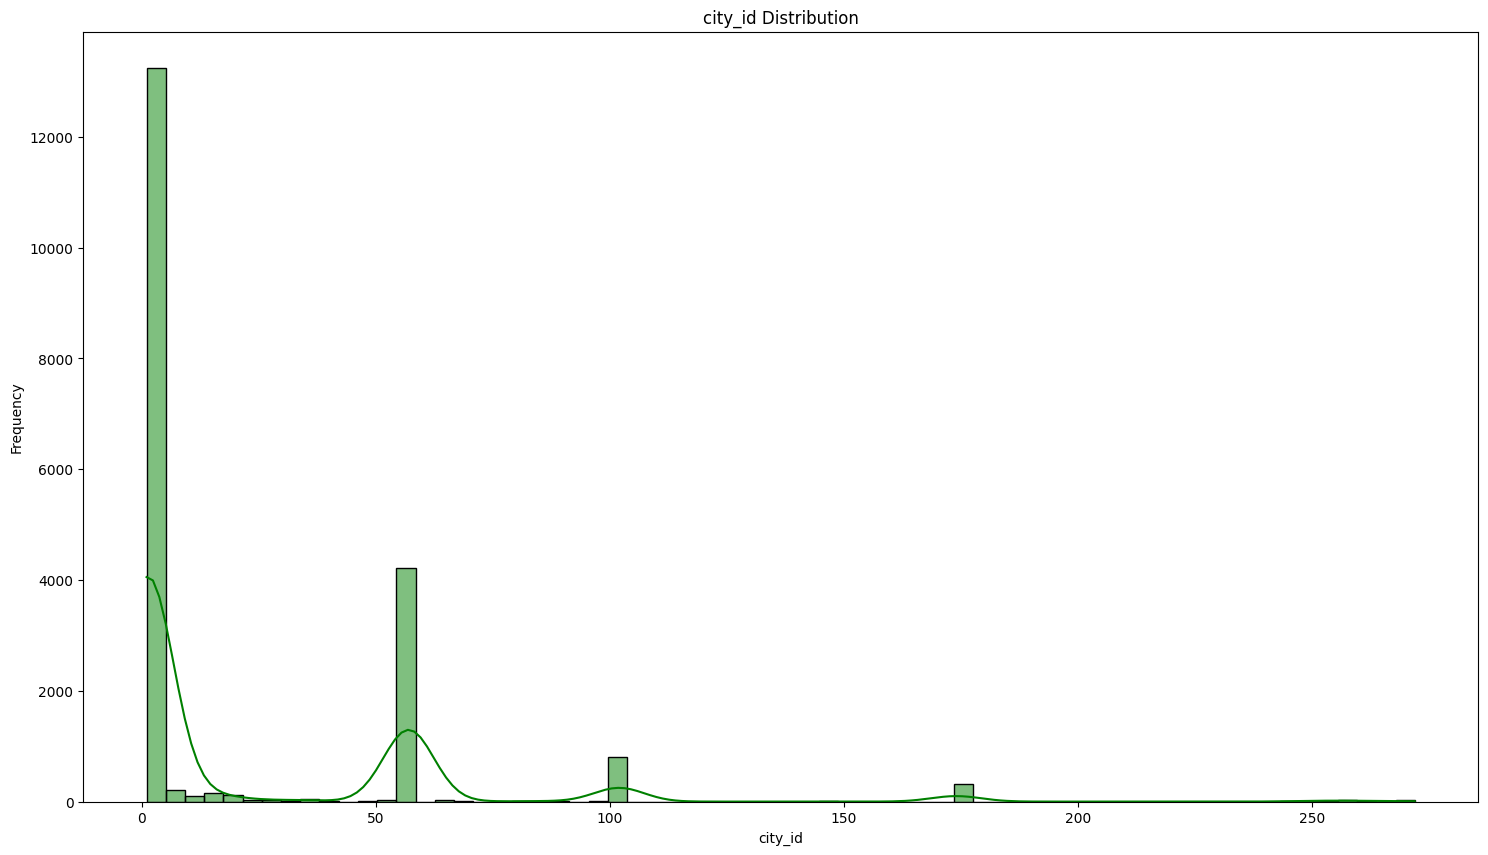

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


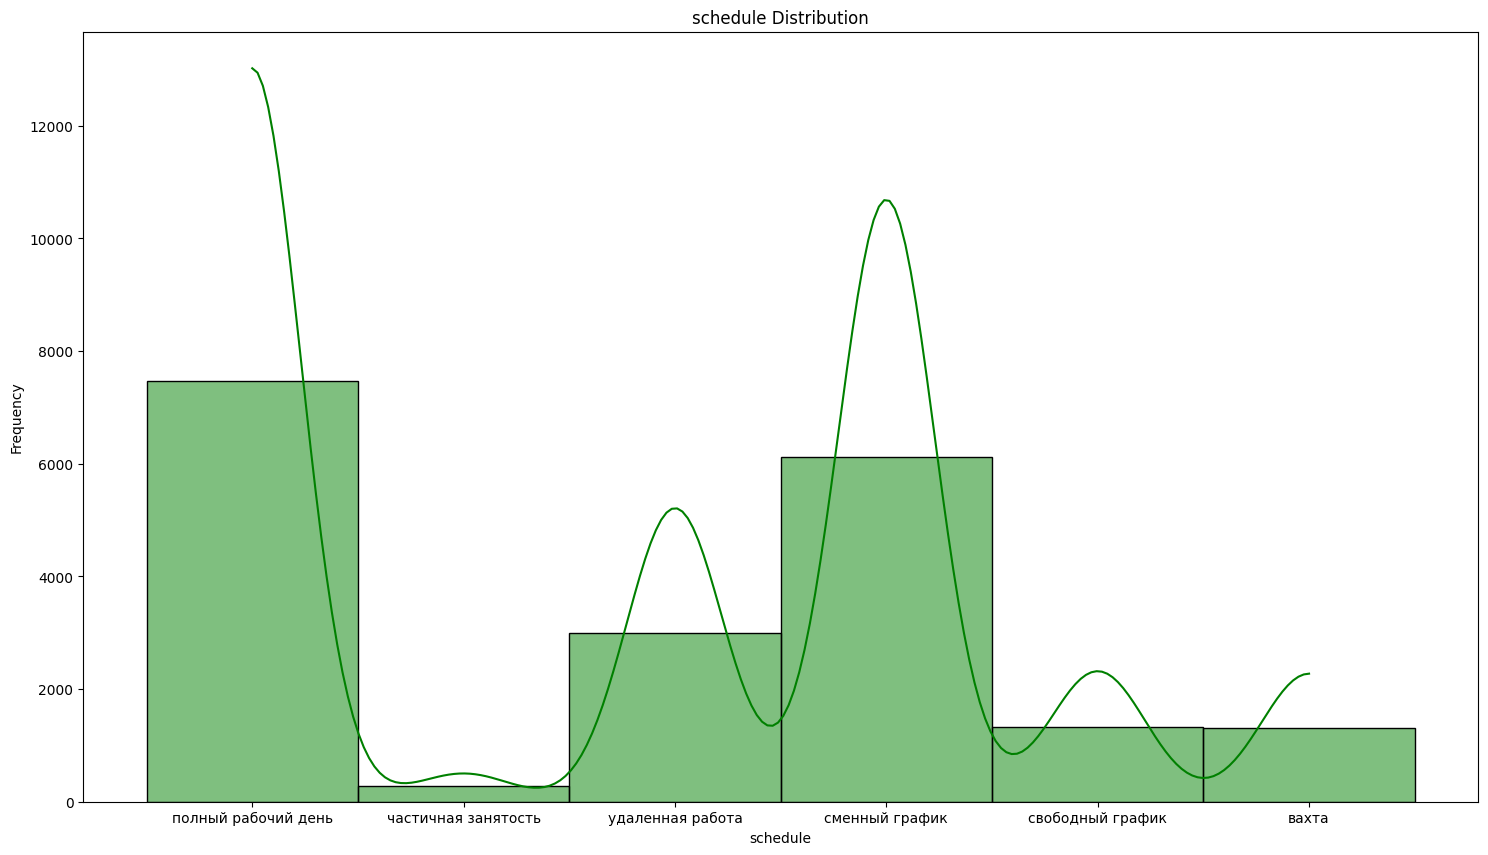

In [ ]:
import seaborn as sns

def frequency_graph(column_name, data):
  """Creates a frequency graph for the given data.

  Args:
    column_name: The name of the column to create the frequency graph for.
    data: The data to create the frequency graph for.
  """

  plt.figure(figsize=(18, 10))
  sns.histplot(data, kde=True, color='green')
  plt.xlabel(f"{column_name}")
  plt.ylabel('Frequency')
  plt.title(f'{column_name} Distribution');
  plt.show()

column_list = eda_data.columns.tolist()


for column in column_list:
  frequency_graph(column, eda_data[column])
  print("\n\n\n")


Text(0.5, 1.0, 'Combined Salary Distribution')

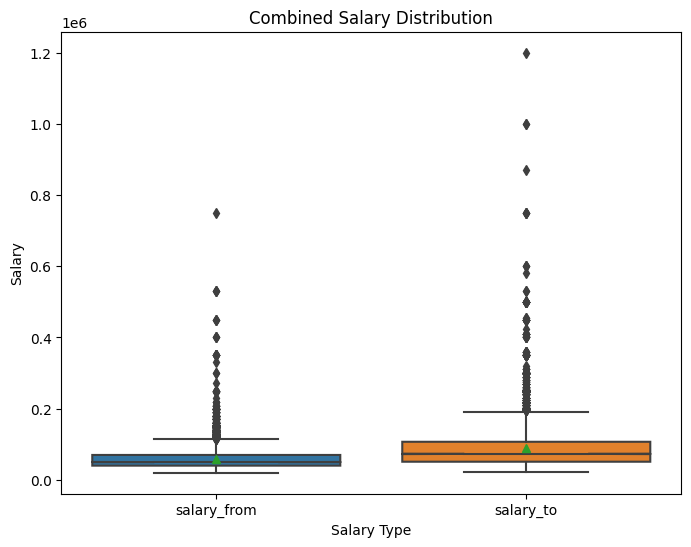

In [ ]:
salary_data = eda_data[['salary_from', 'salary_to']].melt(var_name='Salary Type', value_name='Salary')

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Salary Type',
    y='Salary',
    showmeans=True,
    notch=True,
    whis=1.5,
    data=salary_data)

plt.xlabel("Salary Type")
plt.ylabel('Salary')
plt.title('Combined Salary Distribution')

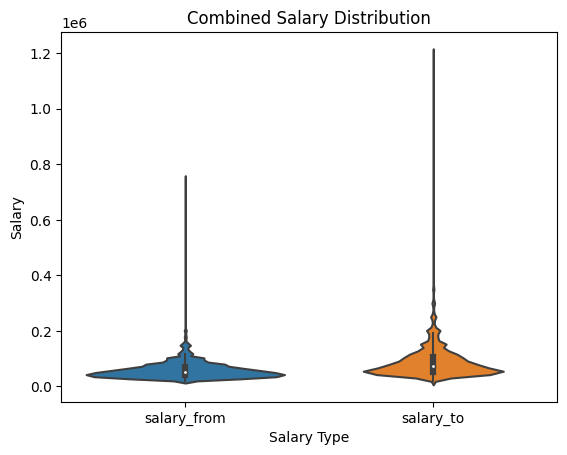

In [ ]:

sns.violinplot(
    x='Salary Type',
    y='Salary',
    data=salary_data)

plt.xlabel("Salary Type")
plt.ylabel('Salary')
plt.title('Combined Salary Distribution')
plt.show()

In [ ]:
sample_df

,id,custom_position,schedule,salary_from,salary_to,salary_pay_type,offer_education_id,education_name,education_is_base,education_order_num,city_id,list_regions,work_skills,tags_id
16765,48703442,Мерчендайзер (проспект Вернадского),полный рабочий день,50000,60000,NaN,0,любое,True,0,1,[3],"['выкладка товара', 'ТСД', 'фотоотчет визита',...",[9]
12739,48620393,Печатник цифровой типографии,полный рабочий день,45000,50000,NaN,0,любое,True,0,2,[4],"['пунктуальность', 'аккуратность', 'Adobe Acro...",NaN
10222,48530185,барбер,сменный график,50000,80000,NaN,0,любое,True,0,57,[1207],"['мужская стрижка', 'Моделирование бороды']",NaN
8237,48466825,Оператор call-центра / Менеджер по работе с кл...,удаленная работа,25000,40000,NaN,0,любое,True,0,6,"[3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18...","['коммуникабельность', 'стрессоустойчивость', ...","[6, 8, 9]"
15727,48689255,Грузчик,сменный график,47000,70000,NaN,0,любое,True,0,57,[206],"['прием товара', 'погрузка разгрузка', 'выгруз...","[5, 6, 9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17159,48707371,Продавец-консультант,сменный график,50000,70000,NaN,0,любое,True,0,1,[3],"['консультирование', 'демонстрация товара', 'о...","[5, 6]"
12407,48607700,Горничная с проживанием (Карелия),вахта,65000,78000,NaN,0,любое,True,0,1,[3],"['смена постельного белья', 'влажная уборка', ...",NaN
9875,48518536,Водитель-курьер,сменный график,99000,180000,NaN,0,любое,True,0,2,[4],"['доставка заказов', 'водительское удостоверен...","[5, 6, 9]"
8528,48476659,Продавец-консультант ВкусВилл,сменный график,60000,70000,NaN,0,любое,True,0,1,[3],"['прием товар', 'консультирование покупателей'...","[5, 9]"


# **корреляционный анализ**

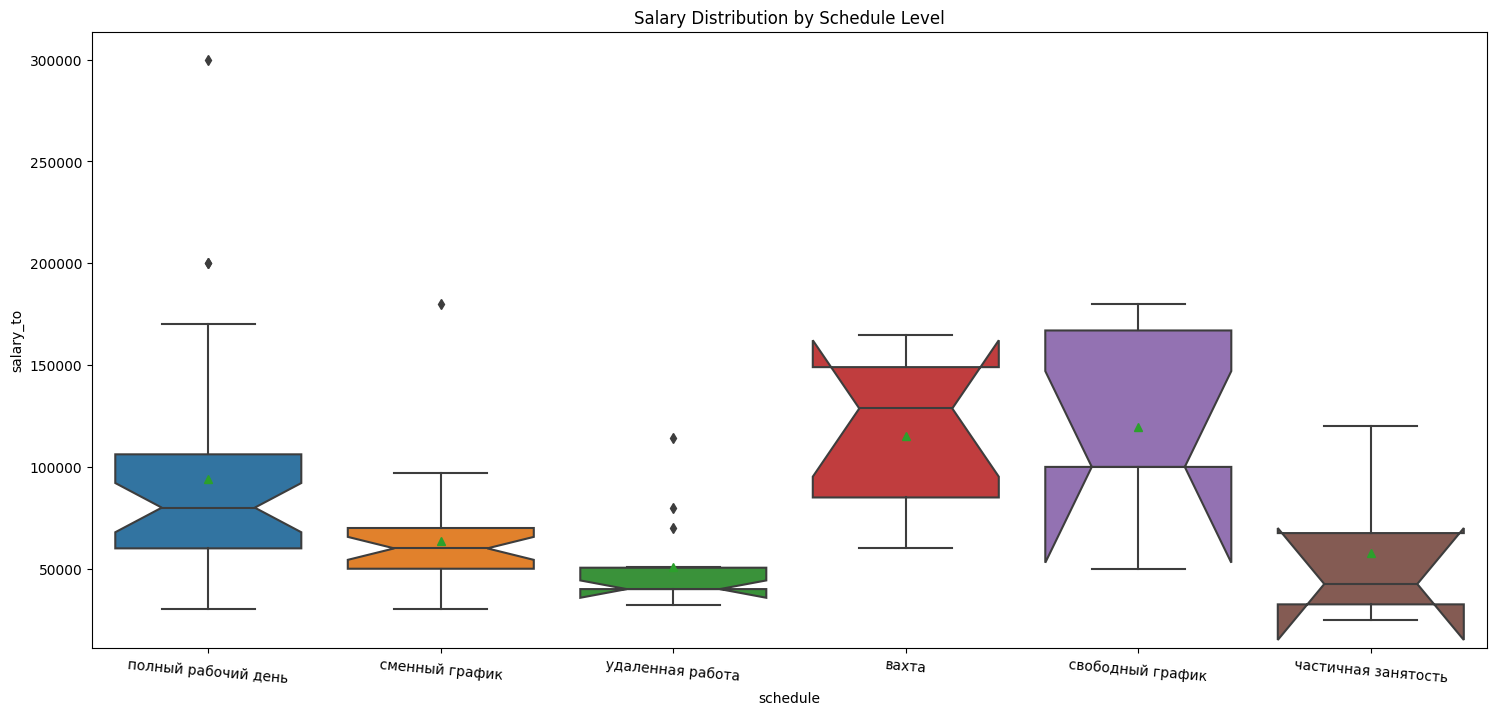

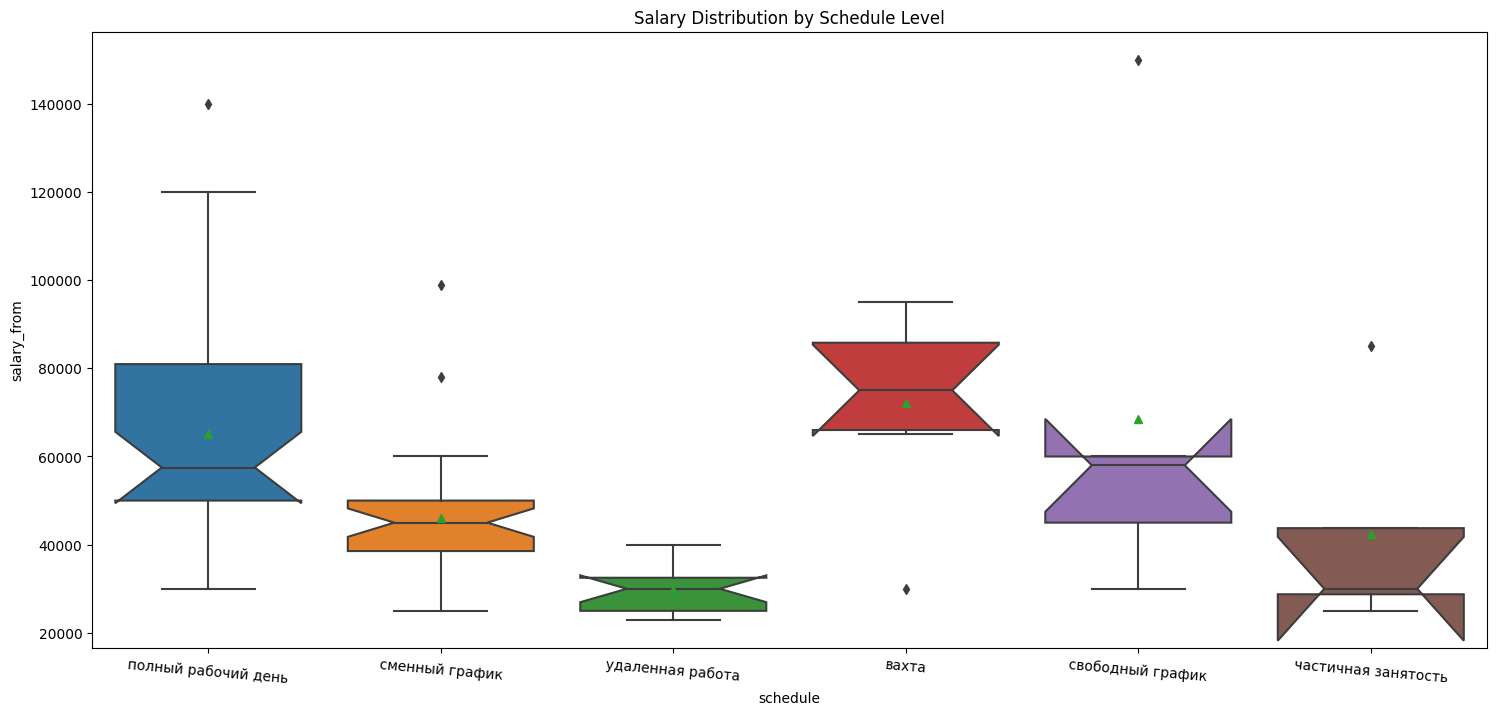

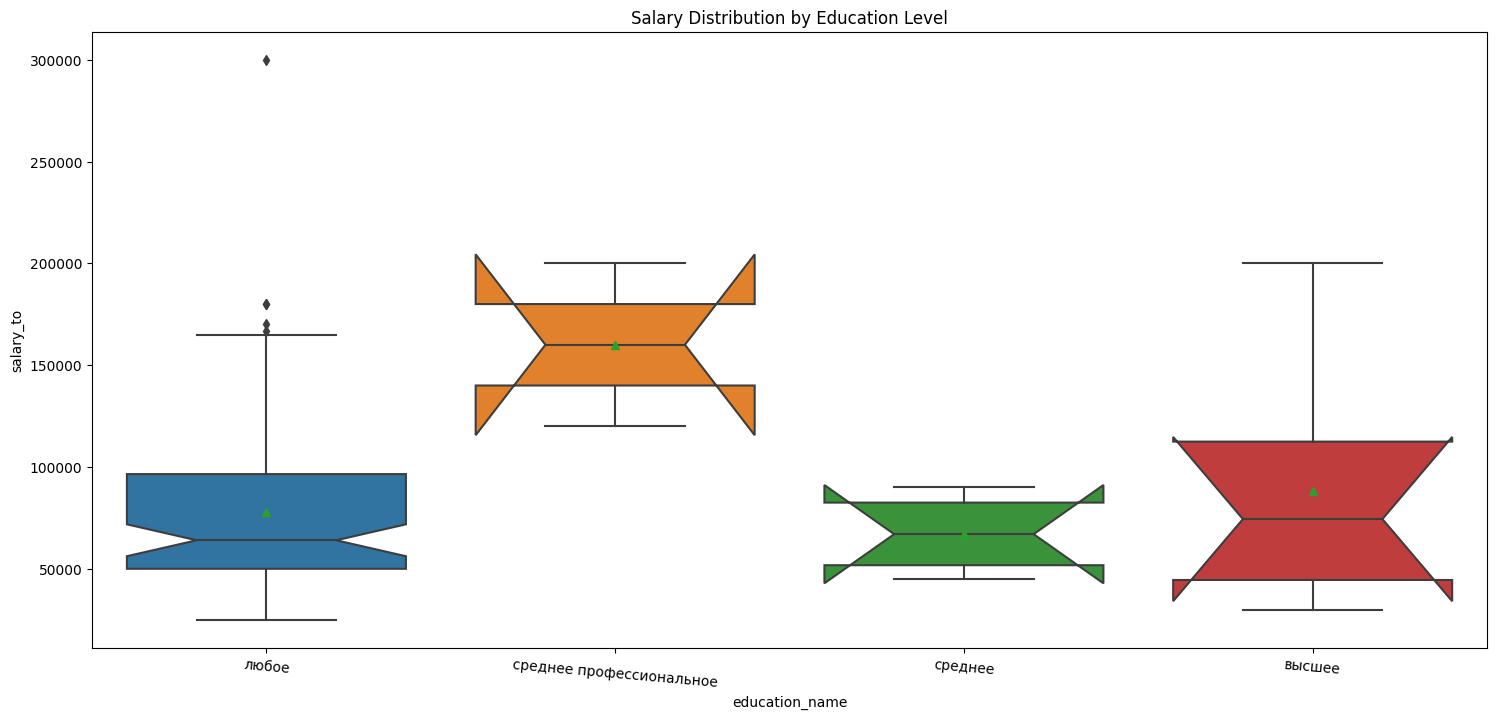

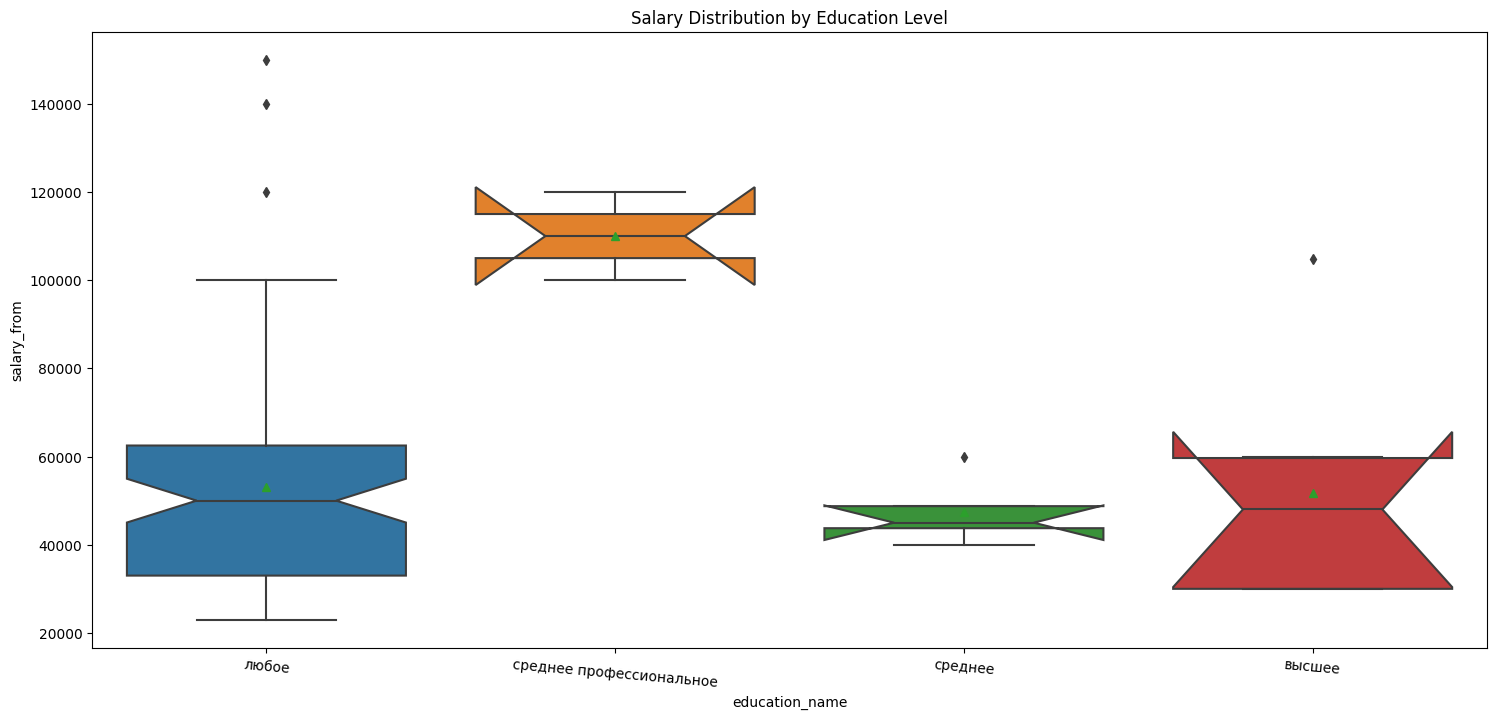

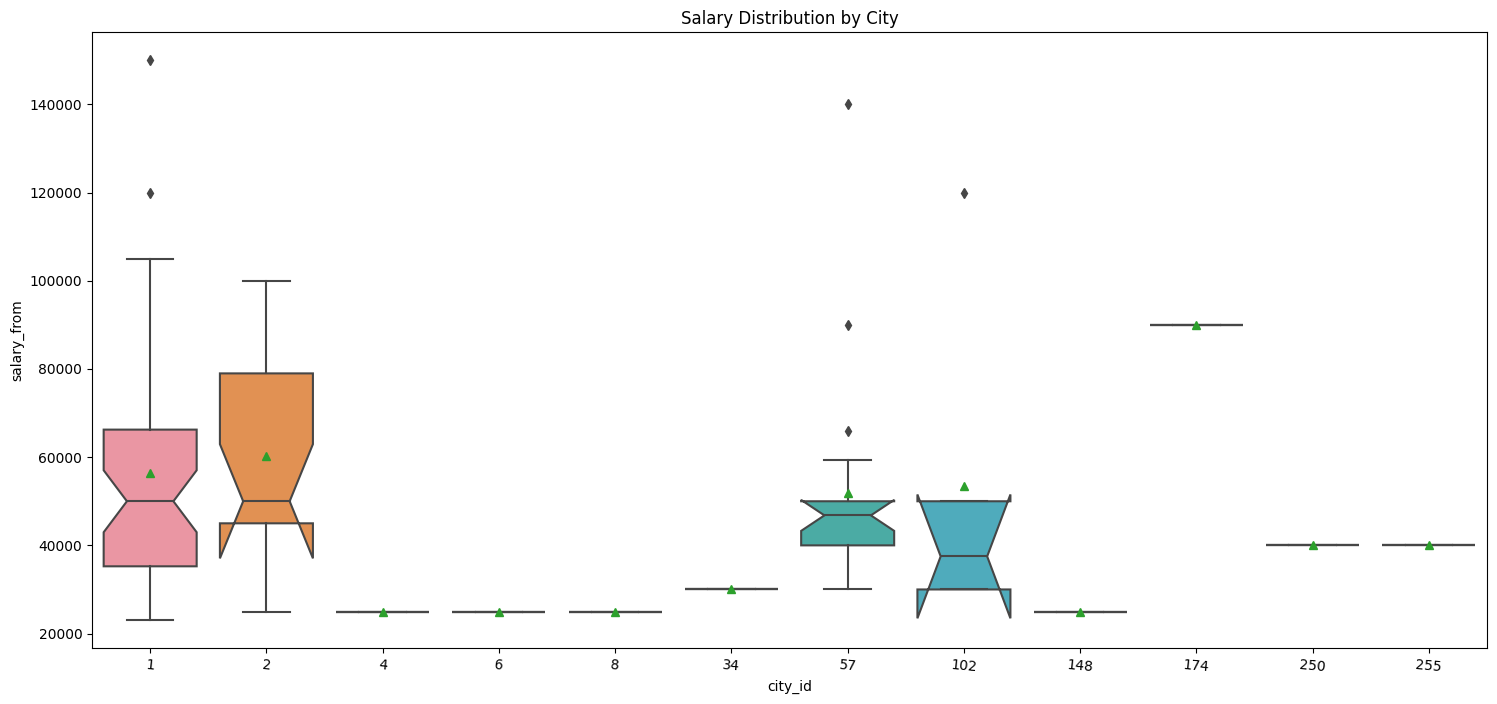

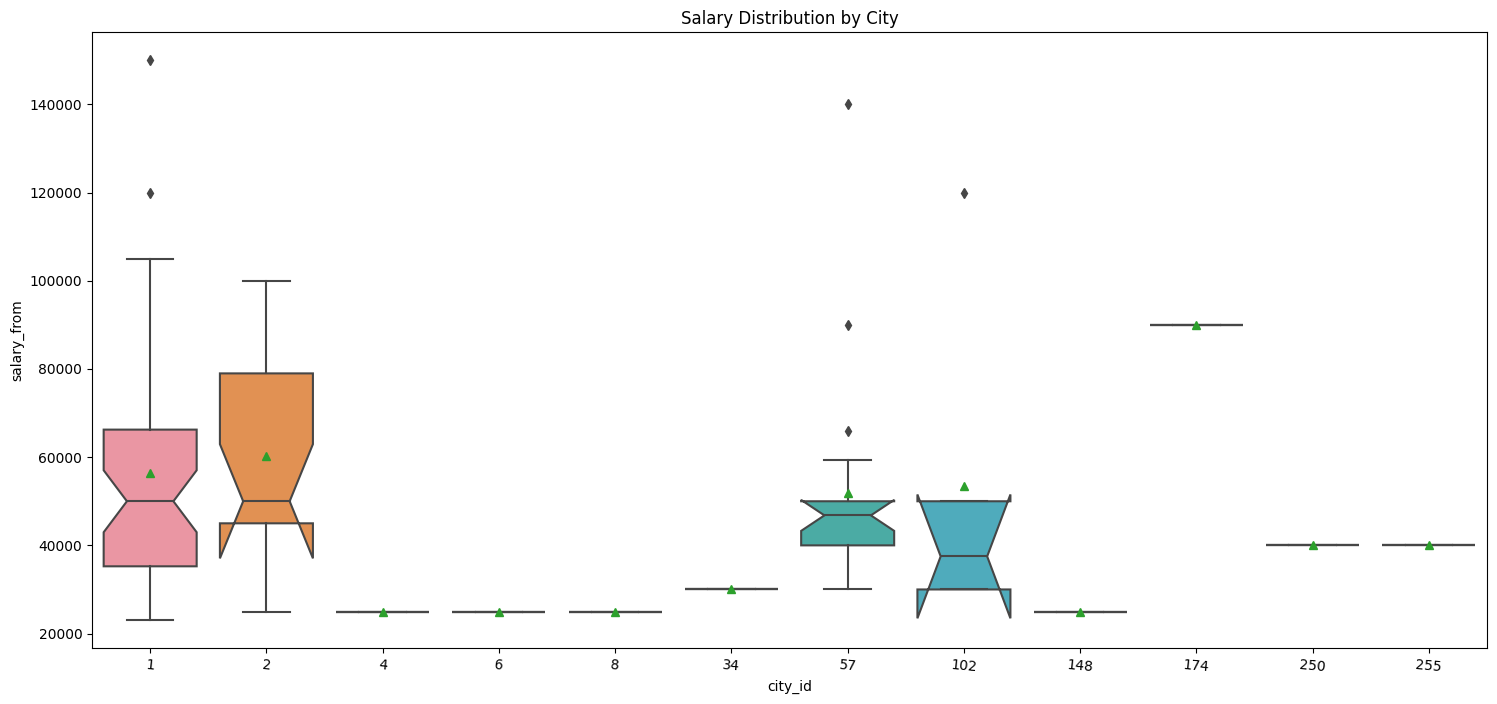

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def create_boxplot(data, x_column, y_column, title, figsize=(18, 8)):
  """Creates a boxplot using Seaborn.

  Args:
    data: The data to use to create the boxplot.
    x_column: The name of the x-axis column.
    y_column: The name of the y-axis column.
    title: The title of the boxplot.
    figsize: The figure size of the plot.
  """

  plt.figure(figsize=figsize)
  sns.boxplot(
      x=x_column,
      y=y_column,
      showmeans=True,
      notch=True,
      whis=1.5,
      data=data,
  )
  plt.xticks(rotation=-5)
  plt.title(title)
  plt.show()


# Create the boxplots.
create_boxplot(sample_df, "schedule", "salary_to", "Salary Distribution by Schedule Level")
create_boxplot(sample_df, "schedule", "salary_from", "Salary Distribution by Schedule Level")
create_boxplot(sample_df, "education_name", "salary_to", "Salary Distribution by Education Level")
create_boxplot(sample_df, "education_name", "salary_from", "Salary Distribution by Education Level")
create_boxplot(sample_df, "city_id", "salary_from", "Salary Distribution by City")
create_boxplot(sample_df, "city_id", "salary_from", "Salary Distribution by City")

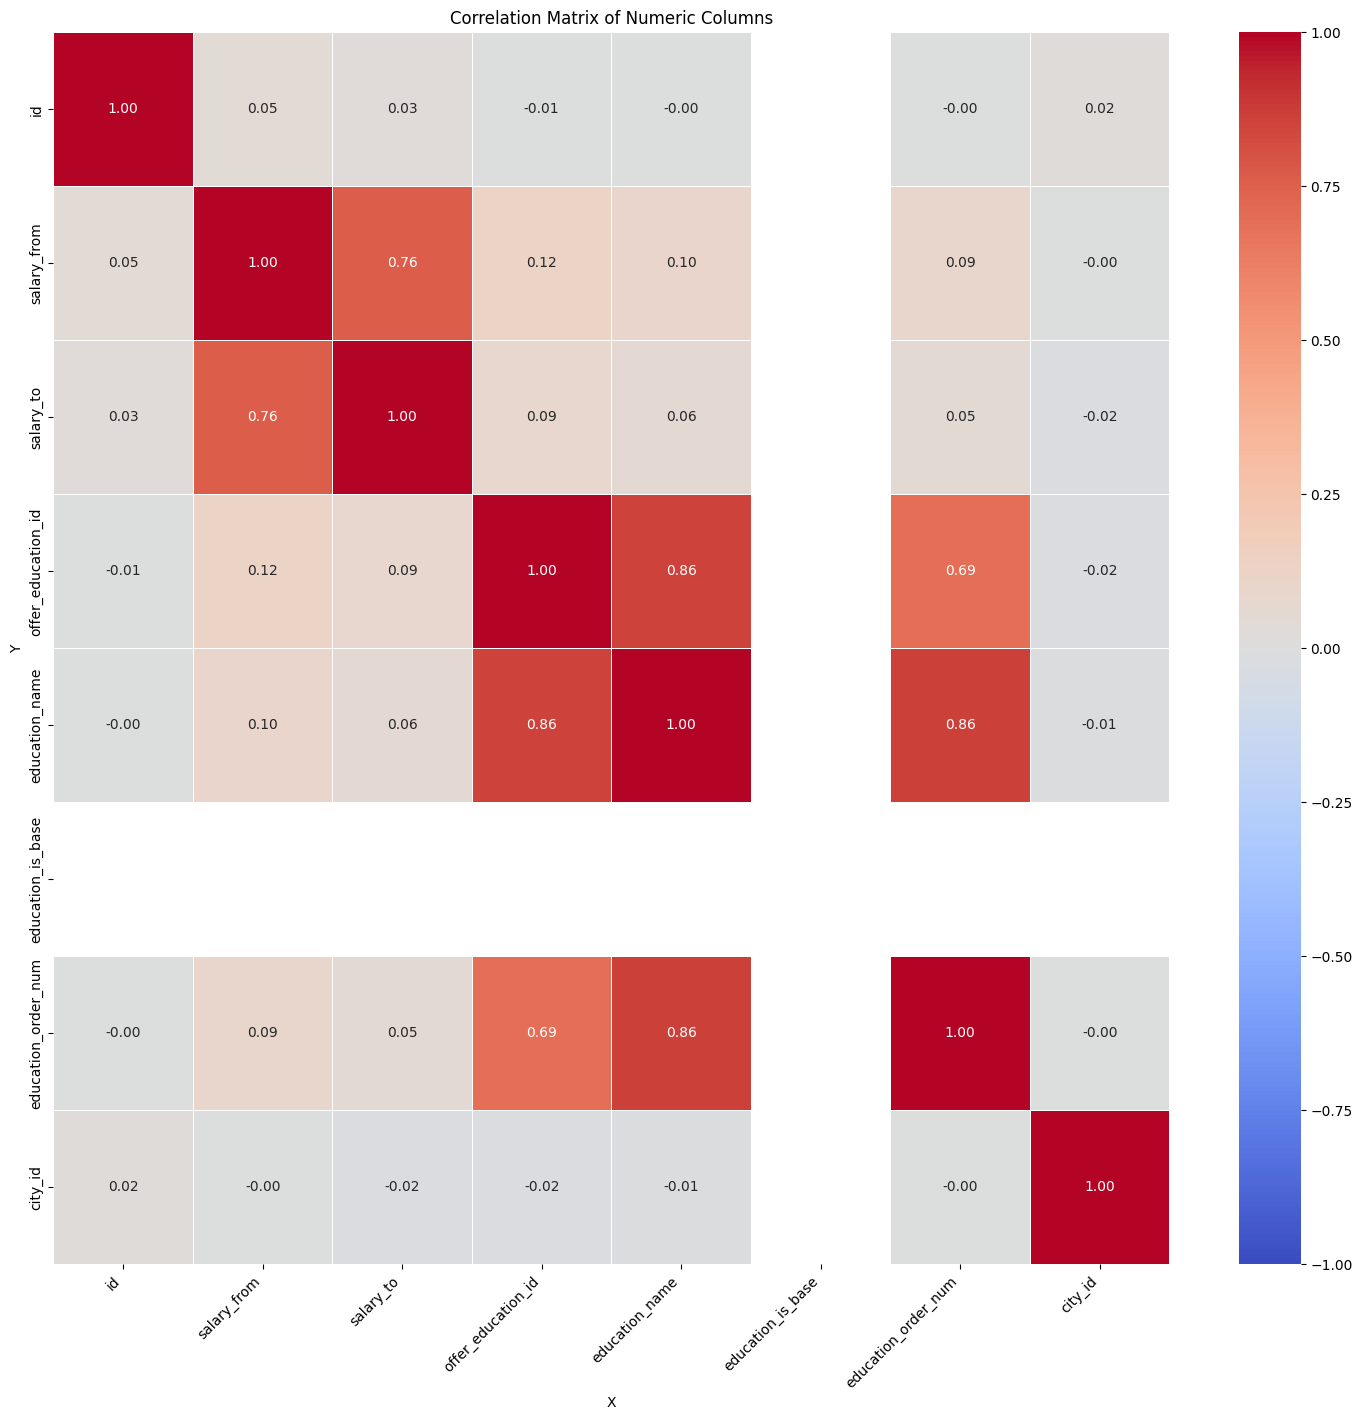

In [ ]:
numeric_df = eda_data.select_dtypes(include=['int', 'float'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.5)

plt.title('Correlation Matrix of Numeric Columns')
plt.xlabel('X')
plt.ylabel('Y')

plt.xticks(rotation=45, ha='right')

plt.show()

- График показывает, что существует положительная корреляция между уровнем образования и заработной платой. Это означает, что люди с более высоким уровнем образования, скорее всего, будут зарабатывать больше. Однако корреляция не идеальна.

- Некоторые люди с более низким уровнем образования зарабатывают больше, чем люди с более высоким уровнем образования, но в целом люди с более высоким уровнем образования зарабатывают больше.

- Также стоит отметить, что распределение заработной платы для каждого уровня образования асимметрично вправо, что означает, что больше людей зарабатывают более низкую заработную плату, чем людей, зарабатывающих более высокую заработную плату.

<ipython-input-39-0a3e98970c34>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


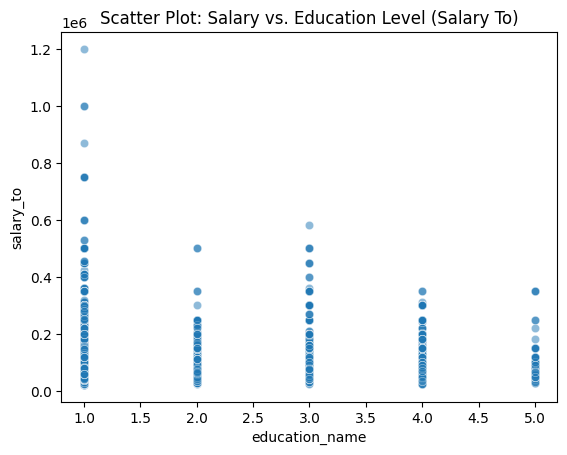

<ipython-input-39-0a3e98970c34>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


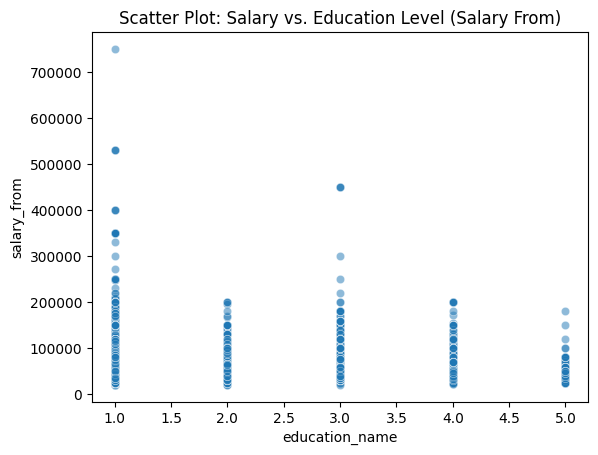

In [ ]:
def create_scatter_plot(data, x_column, y_column, title, palette):
  """Creates a scatter plot using Seaborn.

  Args:
    data: The data to use to create the scatter plot.
    x_column: The name of the x-axis column.
    y_column: The name of the y-axis column.
    title: The title of the scatter plot.
    palette: The color palette to use for the scatter plot.
  """

  sns.scatterplot(
      x=x_column,
      y=y_column,
      alpha=0.5,
      palette=palette,
      data=data,
  )

  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(title)
  plt.show()


# Create the scatter plots.
create_scatter_plot(eda_data, "education_name", "salary_to", "Scatter Plot: Salary vs. Education Level (Salary To)", "viridis")
create_scatter_plot(eda_data, "education_name", "salary_from", "Scatter Plot: Salary vs. Education Level (Salary From)", "inferno")

- График показывает положительную корреляцию между уровнем образования и заработной платой. Люди с более высоким уровнем образования, скорее всего, будут зарабатывать больше, но корреляция не идеальна.

In [ ]:
eda_data['schedule']

0        полный рабочий день
1        полный рабочий день
2        полный рабочий день
3        частичная занятость
4        частичная занятость
                ...         
19484    полный рабочий день
19485         сменный график
19486    полный рабочий день
19487    полный рабочий день
19488    полный рабочий день
Name: schedule, Length: 19489, dtype: object

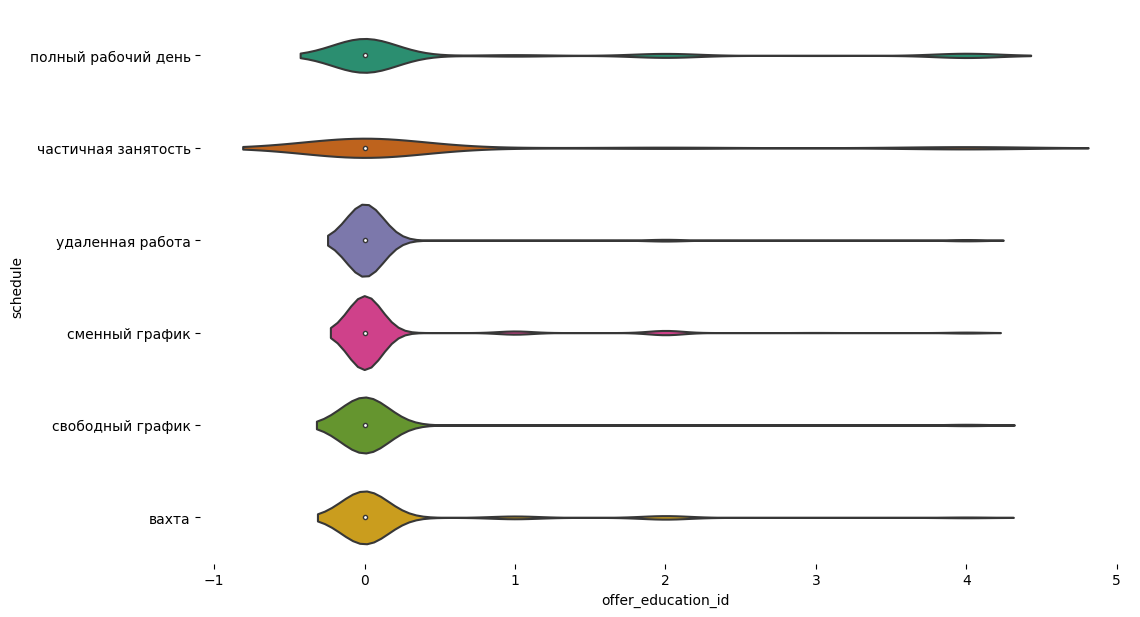

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(eda_data['schedule'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(eda_data, x='offer_education_id', y='schedule', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

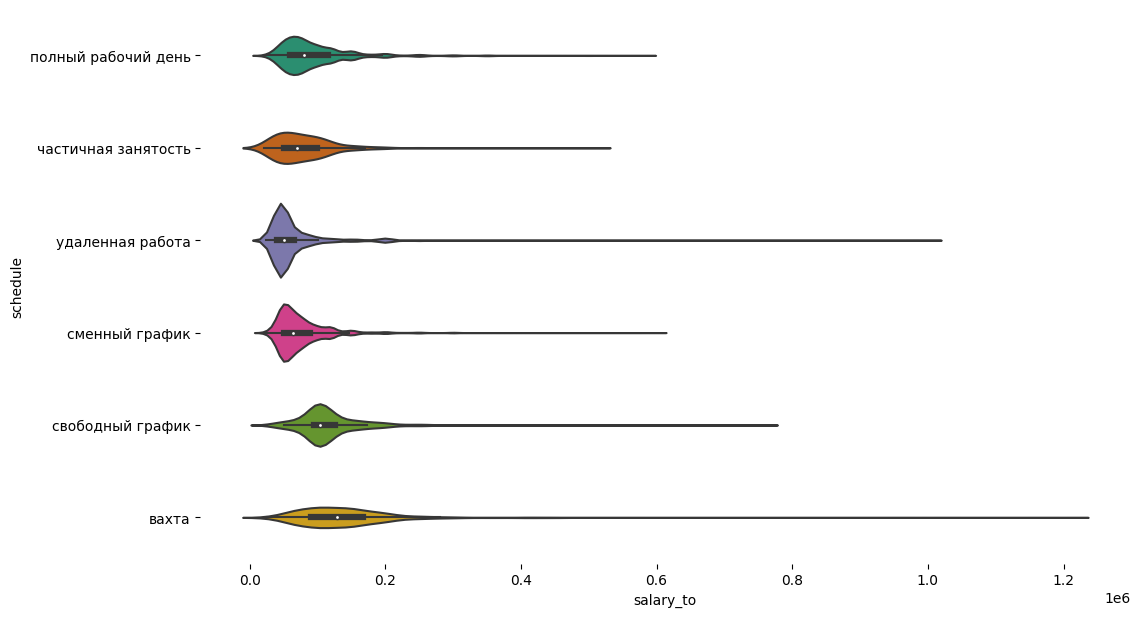

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(eda_data['schedule'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(eda_data, x='salary_to', y='schedule', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

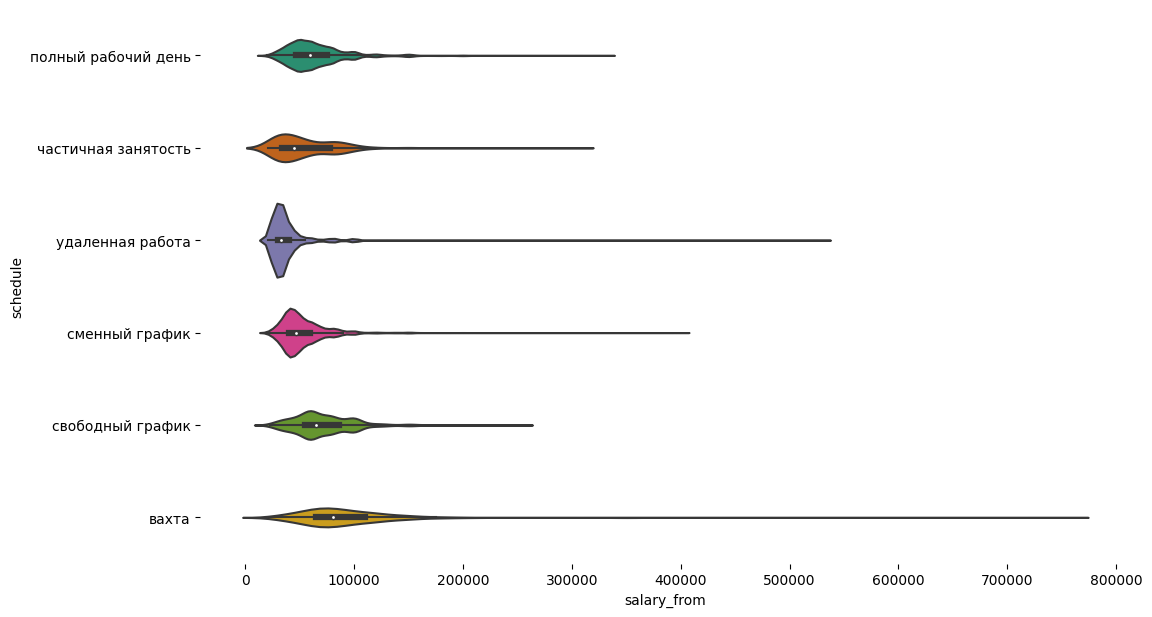

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(eda_data['schedule'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(eda_data, x='salary_from', y='schedule', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

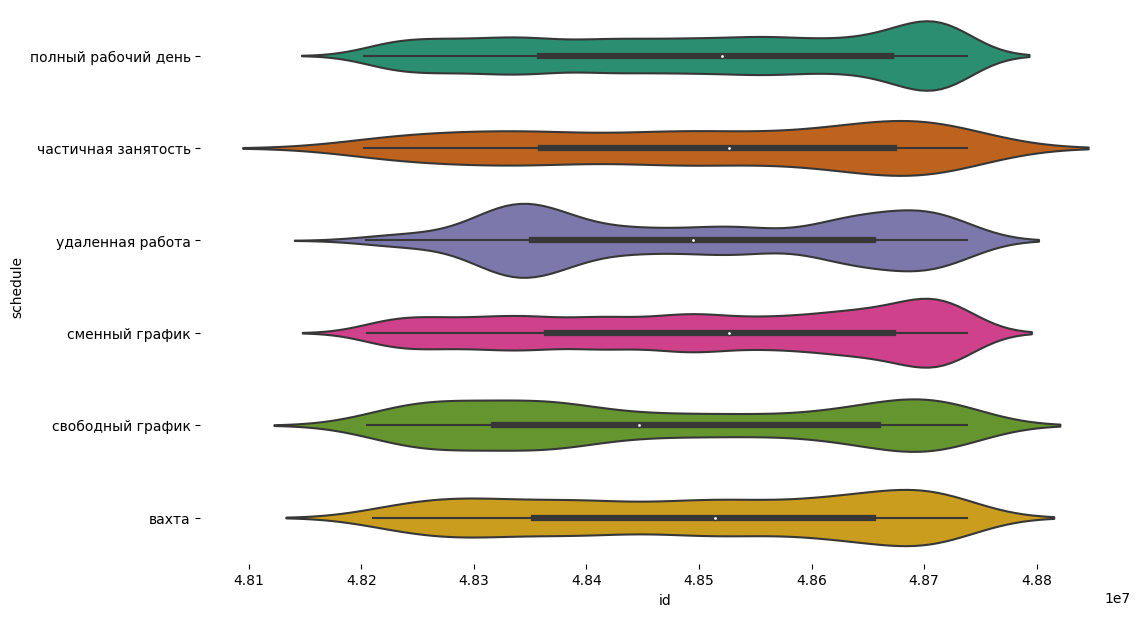

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(eda_data['schedule'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(eda_data, x='id', y='schedule', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

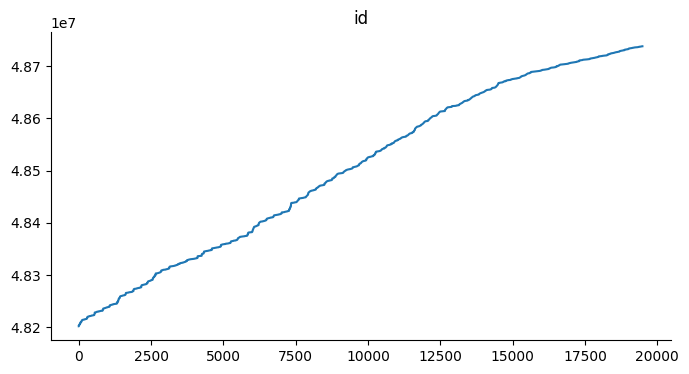

In [44]:
from matplotlib import pyplot as plt
eda_data['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

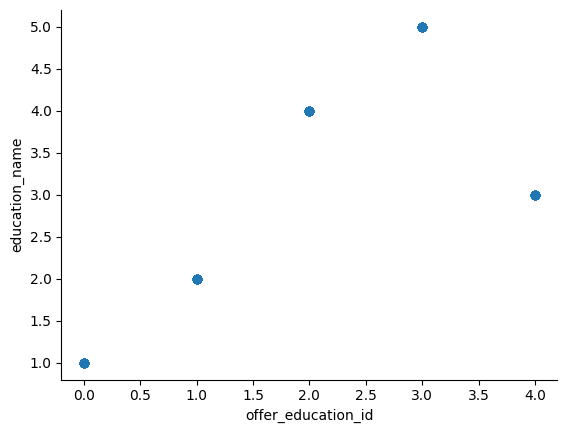

In [45]:
from matplotlib import pyplot as plt
eda_data.plot(kind='scatter', x='offer_education_id', y='education_name', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

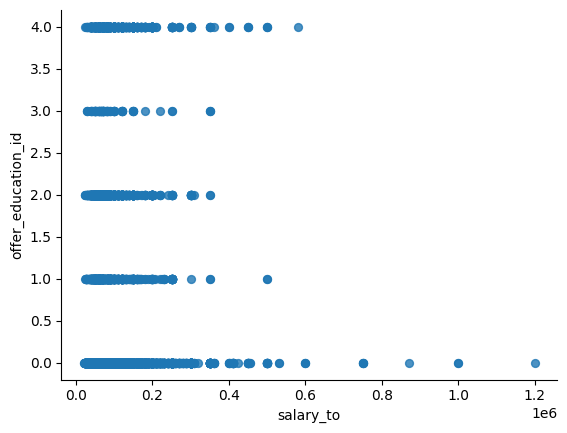

In [46]:
from matplotlib import pyplot as plt
eda_data.plot(kind='scatter', x='salary_to', y='offer_education_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

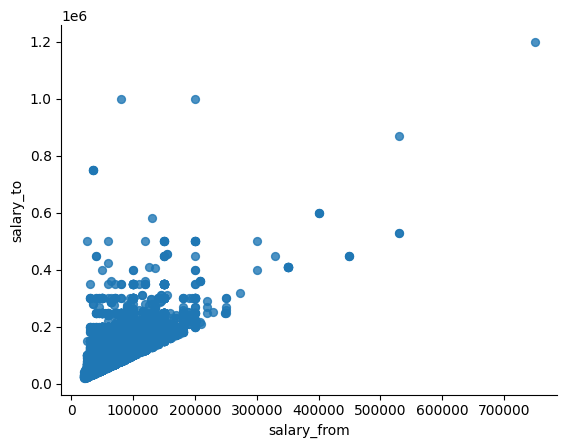

In [47]:
from matplotlib import pyplot as plt
eda_data.plot(kind='scatter', x='salary_from', y='salary_to', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

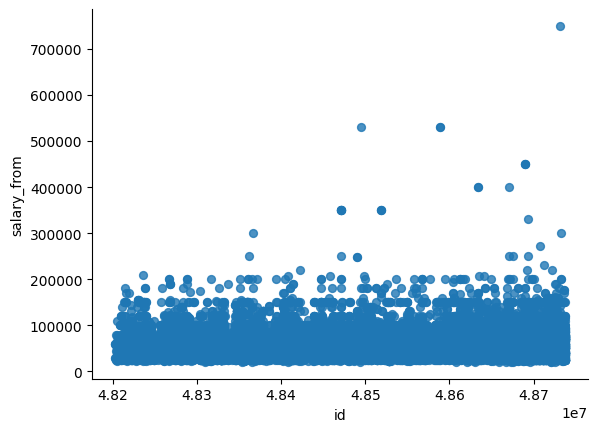

In [48]:
from matplotlib import pyplot as plt
eda_data.plot(kind='scatter', x='id', y='salary_from', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

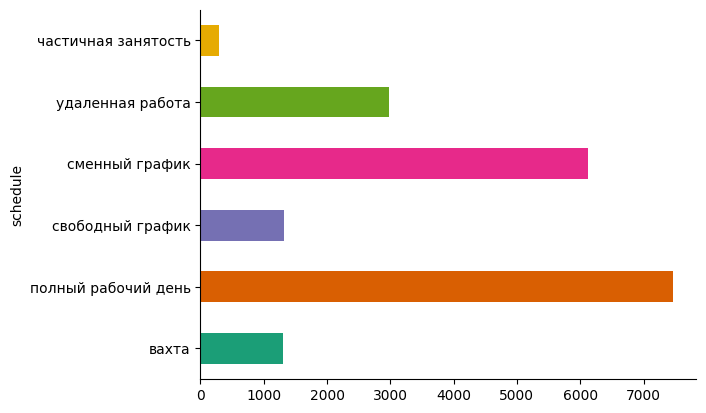

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
eda_data.groupby('schedule').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

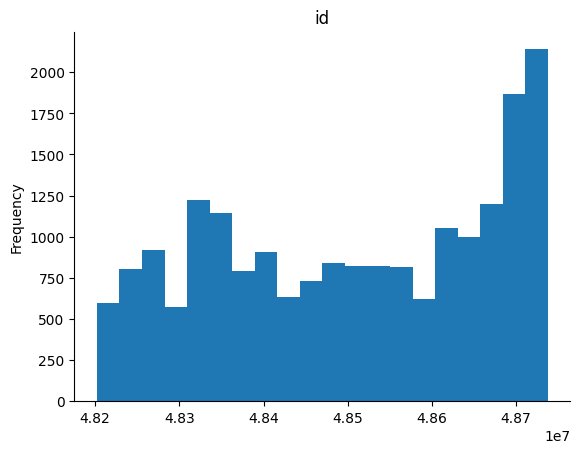

In [50]:
from matplotlib import pyplot as plt
eda_data['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)